<a href="https://colab.research.google.com/github/harshapriyanka/MachineLearning/blob/master/SHALA-2020/Assignments/MachineLearning/L2/Assignment_ML_L2_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [0]:
import pandas as pd 
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, make_scorer, precision_score, average_precision_score


import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/harshapriyanka/MachineLearning/master/SHALA-2020/Assignments/MachineLearning/L2/titanic.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_data.shape

(891, 12)

In [0]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*   We have 5 categorical features.


In [0]:
target = titanic_data['Survived'].copy()
titanic_data = titanic_data.drop(['Survived'], axis=1);
titanic_data.shape

(891, 11)

In [0]:
md = titanic_data.isna().sum()
md_percent = titanic_data.isnull().sum()/titanic_data.isnull().count()*100
print(pd.concat([md, md_percent], axis=1, keys=['Total', '%']))

             Total          %
PassengerId      0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467


1.   'Embarked' has only two missing values.
2.   'Cabin' has almost 77% missing values. 

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_data, target, test_size=0.2, random_state=0)


In [0]:
train_data = pd.concat([x_train,y_train],axis=1)
train_data = pd.DataFrame(train_data)
train_data.head(8)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
140,141,3,"Boulos, Mrs. Joseph (Sultana)",female,NaN,0,2,2678,15.2458,NaN,C,0
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,NaN,S,0
817,818,2,"Mallet, Mr. Albert",male,31.0,1,1,S.C./PARIS 2079,37.0042,NaN,C,0
378,379,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C,0
491,492,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S,0
331,332,1,"Partner, Mr. Austen",male,45.5,0,0,113043,28.5000,C124,S,0
588,589,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S,0
358,359,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q,1


In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          571 non-null    float64
 5   SibSp        712 non-null    int64  
 6   Parch        712 non-null    int64  
 7   Ticket       712 non-null    object 
 8   Fare         712 non-null    float64
 9   Cabin        163 non-null    object 
 10  Embarked     710 non-null    object 
 11  Survived     712 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


In [0]:
train_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,712.000000,712.000000,571.000000,712.000000,712.000000,712.00000,712.000000
mean,443.283708,2.317416,29.745184,0.529494,0.391854,31.86295,0.383427
std,260.003783,0.833767,14.619046,1.140842,0.821368,50.13531,0.486563
min,1.000000,1.000000,0.670000,0.000000,0.000000,0.00000,0.000000
25%,211.750000,2.000000,20.750000,0.000000,0.000000,7.91770,0.000000
50%,441.000000,3.000000,29.000000,0.000000,0.000000,14.45625,0.000000
75%,671.250000,3.000000,38.000000,1.000000,0.000000,31.27500,1.000000
max,890.000000,3.000000,80.000000,8.000000,6.000000,512.32920,1.000000




1.   About 38% survived.
2.   Range of Age is 0.6-80.

1.   Max. Siblings/Spouse a person has is 8.
2.   Max. Parent/Child a person has is 6.





array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f829b41beb8>,
      dtype=object)

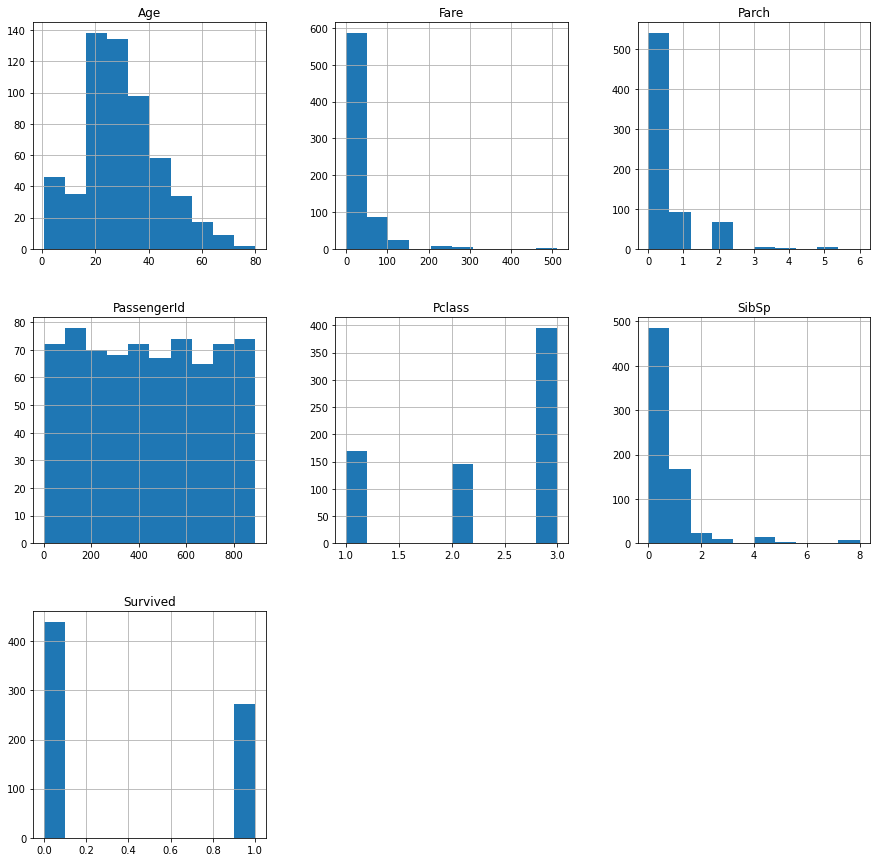

In [0]:
train_data.hist(figsize=(15,15))

In [0]:
print('Passenger ID is unique.') if train_data.PassengerId.nunique() == train_data.shape[0] else print('oops')

Passenger ID is unique.


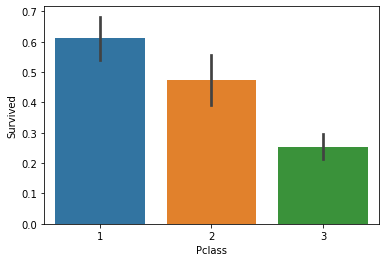

In [0]:
# ax = sns.countplot(x=train_data['Pclass'],data = train_data, hue = train_data['Survived'])
sns.barplot(x='Pclass', y='Survived', data=train_data)

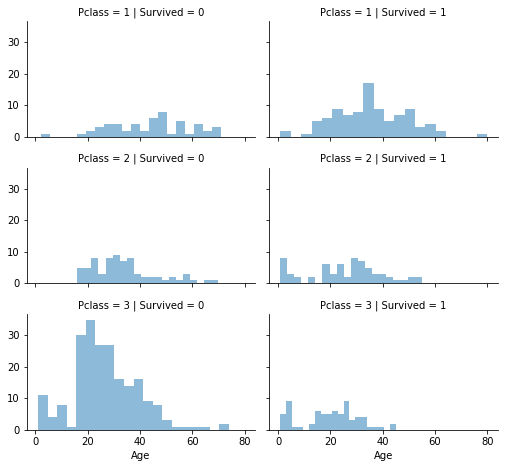

In [0]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

People with 'Pclass' 3 are less likely to survive.

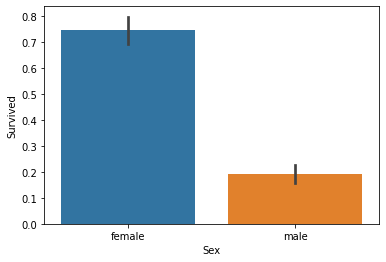

In [0]:
sns.barplot(x='Sex', y='Survived', data=train_data)

%Female passengers survived is more than %Male passengers survived.

Text(0.5, 1.0, 'Male')

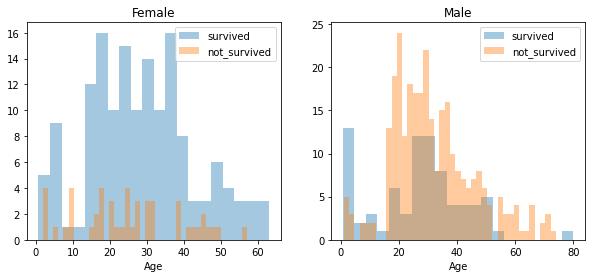

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=20, label = 'survived', ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')



1.   Men with age between 18 and 30 have a high probability of survival.
2.   Women with age between 14 and 40 have a high probability of survival.


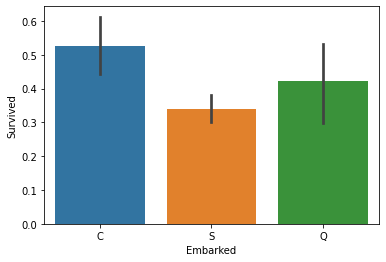

In [0]:
sns.barplot(x='Embarked', y='Survived', data=train_data)

In [0]:
data = [train_data, x_test]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    
train_data = train_data.drop(['SibSp','Parch'],axis=1)
x_test = x_test.drop(['SibSp','Parch'],axis=1)

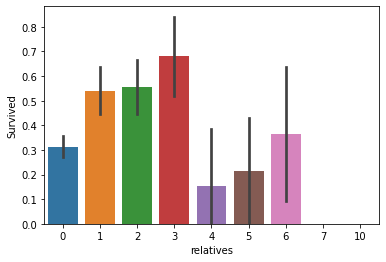

In [0]:
sns.barplot(x='relatives', y='Survived', data=train_data)

# **Data Pre-processing**

First, we will remove 'PassengerID' in both train and test datasets.

In [0]:
data = [train_data, x_test]
for dataset in data:
  dataset = dataset.drop(['PassengerId'], axis=1)

**Fill the Missing values:**

In [0]:
train_data['Embarked'].describe()

count     710
unique      3
top         S
freq      517
Name: Embarked, dtype: object

In [0]:
train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [0]:
x_test['Embarked'].isnull().sum()

0

In [0]:
mean = train_data["Age"].mean()
std = train_data["Age"].std()
is_null = train_data["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = train_data["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
train_data["Age"] = age_slice
train_data["Age"] = train_data["Age"].astype(int)

In [0]:
x_test['Age'].isnull().sum()

36

In [0]:
mean = x_test["Age"].mean()
std = x_test["Age"].std()
is_null = x_test["Age"].isnull().sum()
# compute random numbers between the mean, std and is_null
rand_age = np.random.randint(mean - std, mean + std, size = is_null)
# fill NaN values in Age column with random values generated
age_slice = x_test["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
x_test["Age"] = age_slice
x_test["Age"] = x_test["Age"].astype(int)

In [0]:
train_data['Cabin'].unique()

array([nan, 'C124', 'B71', 'B30', 'A26', 'B57 B59 B63 B66', 'G6', 'B69',
       'E68', 'E121', 'C68', 'B94', 'E17', 'D33', 'D26', 'B58 B60',
       'C128', 'D17', 'A14', 'F33', 'B19', 'D21', 'C148', 'C30', 'D56',
       'E24', 'E40', 'E31', 'E44', 'E38', 'D37', 'E8', 'C92', 'E63',
       'C125', 'F4', 'E67', 'C126', 'B73', 'E36', 'C78', 'E46', 'C111',
       'E101', 'D15', 'E12', 'A32', 'B4', 'A10', 'A5', 'C95', 'E25',
       'C90', 'D6', 'A36', 'D', 'D50', 'B96 B98', 'C93', 'E77', 'C101',
       'D11', 'C123', 'C32', 'B35', 'C91', 'T', 'B101', 'E58', 'A23',
       'B77', 'D28', 'B82 B84', 'B79', 'C45', 'C2', 'B5', 'C104', 'B20',
       'A19', 'B51 B53 B55', 'B80', 'B38', 'B22', 'B18', 'C22 C26', 'A16',
       'F2', 'D47', 'C23 C25 C27', 'B28', 'E10', 'D36', 'C46', 'B39',
       'D30', 'E33', 'C50', 'D20', 'A34', 'C110', 'D19', 'B86', 'D35',
       'C99', 'D46', 'F38', 'A24', 'D7', 'C65', 'C103', 'A31', 'C82',
       'F G63', 'A6', 'E50', 'C52', 'B3', 'B49', 'C118', 'C70', 'F E69',
   

In [0]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "T": 8}
data = [train_data, x_test]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Cabin'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Cabin'] = dataset['Cabin'].map(deck)
    dataset['Cabin'] = dataset['Cabin'].fillna(0)
    dataset['Cabin'] = dataset['Cabin'].astype(int);

# **Converting Features**

In [0]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 140 to 684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Pclass       712 non-null    int64  
 2   Name         712 non-null    object 
 3   Sex          712 non-null    object 
 4   Age          712 non-null    int64  
 5   Ticket       712 non-null    object 
 6   Fare         712 non-null    float64
 7   Cabin        712 non-null    int64  
 8   Embarked     712 non-null    object 
 9   Survived     712 non-null    int64  
 10  relatives    712 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 86.8+ KB


In [0]:
data = [train_data, x_test]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [0]:
genders = {"male": 0, "female": 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [0]:
embarked = {"C": 0, "S": 1, "Q":2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked)

Looks like 'Name' and 'Ticket' doesn't have much **additional** information about survival. So I will just drop them.

In [0]:
train_data = train_data.drop(['Name','Ticket'], axis=1)
x_test = x_test.drop(['Name','Ticket'], axis=1)

# **Create Categories**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8297c40668>]],
      dtype=object)

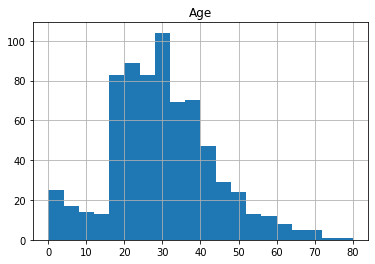

In [0]:
train_data.hist(column='Age', bins=20)

In [0]:
pd.qcut(train_data['Age'],8)

140      (21.0, 24.0]
439      (29.0, 32.0]
817      (29.0, 32.0]
378    (16.875, 21.0]
491    (16.875, 21.0]
            ...      
835      (37.0, 45.0]
192    (16.875, 21.0]
629      (21.0, 24.0]
559      (32.0, 37.0]
684      (45.0, 80.0]
Name: Age, Length: 712, dtype: category
Categories (8, interval[float64]): [(-0.001, 16.875] < (16.875, 21.0] < (21.0, 24.0] < (24.0, 29.0] <
                                    (29.0, 32.0] < (32.0, 37.0] < (37.0, 45.0] < (45.0, 80.0]]

In [0]:
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 21), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 21) & (dataset['Age'] <= 24), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 28), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 32), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 37), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 45), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 45, 'Age'] = 7

train_data['Age'].value_counts()

36    33
30    31
22    29
24    27
19    26
      ..
10     1
12     1
13     1
53     1
80     1
Name: Age, Length: 71, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8297b66b38>]],
      dtype=object)

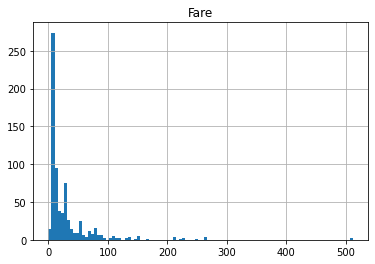

In [0]:
train_data.hist(column='Fare', bins=100)

In [0]:
pd.qcut(train_data['Fare'],6)

140     (14.0, 26.0]
439      (8.0, 14.0]
817     (26.0, 52.0]
378    (-0.001, 7.0]
491    (-0.001, 7.0]
           ...      
835    (52.0, 512.0]
192    (-0.001, 7.0]
629    (-0.001, 7.0]
559     (14.0, 26.0]
684     (26.0, 52.0]
Name: Fare, Length: 712, dtype: category
Categories (6, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 14.0] < (14.0, 26.0] <
                                    (26.0, 52.0] < (52.0, 512.0]]

In [0]:
for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 8), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8) & (dataset['Fare'] <= 14), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 26), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 26) & (dataset['Fare'] <= 52), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 52, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# **New Feature:** Fare_Per_Person


In [0]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)
train_data.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Survived,relatives
140,141,3,1,22,15,0,0,0,2
439,440,2,0,31,10,0,1,0,0
817,818,2,0,31,37,0,0,0,2
378,379,3,0,20,4,0,0,0,0
491,492,3,0,21,7,0,1,0,0
331,332,1,0,45,28,3,1,0,0
588,589,3,0,22,8,0,1,0,0
358,359,3,1,36,7,0,2,1,0
674,675,2,0,30,0,0,1,0,0
162,163,3,0,26,7,0,1,0,0


# **Modeling**

In [0]:
x_train = train_data.drop("Survived", axis=1)
y_train = train_data["Survived"]

In [0]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
print('Random Forest Accuracy of validation data: {:.3f}'.format(accuracy_score(y_test, rf.predict(x_test))))
print(classification_report(y_test, rf.predict(x_test)))

Random Forest Accuracy of validation data: 0.821
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       110
           1       0.85      0.65      0.74        69

    accuracy                           0.82       179
   macro avg       0.83      0.79      0.80       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 1.0, 'Random Forest')

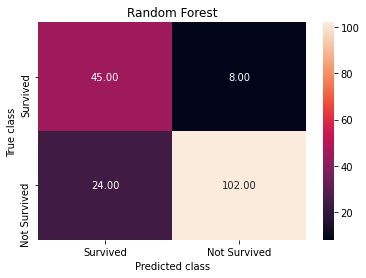

In [0]:
y_pred = rf.predict(x_test)
forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

In [0]:
svc = SVC(random_state=0, probability=True)
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
print('Support vector machine accuracy of validation data: {:.3f}'.format(accuracy_score(y_test, svc.predict(x_test))))
print(classification_report(y_test, svc.predict(x_test)))

Support vector machine accuracy of validation data: 0.659
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       110
           1       0.90      0.13      0.23        69

    accuracy                           0.66       179
   macro avg       0.77      0.56      0.50       179
weighted avg       0.74      0.66      0.57       179



Text(0.5, 1.0, 'SVC')

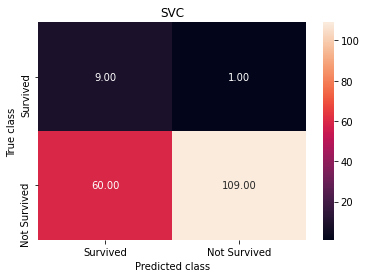

In [0]:
y_pred = svc.predict(x_test)
svc_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(svc_cm, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('SVC')

In [0]:
dt = DecisionTreeClassifier() 
dt.fit(x_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
print('Decision Tree accuracy of validation data: {:.3f}'.format(accuracy_score(y_test, dt.predict(x_test))))
print(classification_report(y_test, dt.predict(x_test)))

Decision Tree accuracy of validation data: 0.777
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       110
           1       0.71      0.71      0.71        69

    accuracy                           0.78       179
   macro avg       0.76      0.76      0.76       179
weighted avg       0.78      0.78      0.78       179



Text(0.5, 1.0, 'Decision Tree')

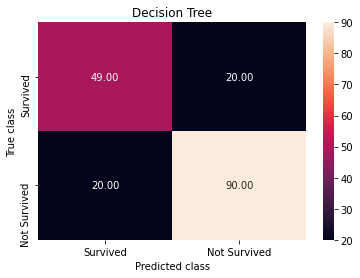

In [0]:
y_pred = dt.predict(x_test)
dt_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
sns.heatmap(dt_cm, annot=True, fmt='.2f',xticklabels = ["Survived", "Not Survived"] , yticklabels = ["Survived", "Not Survived"])
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree')

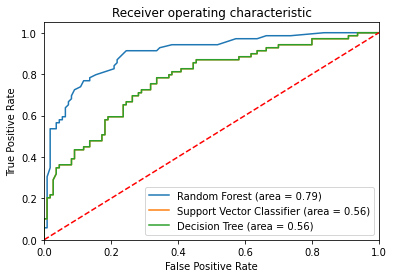

In [0]:
rf_roc_auc = roc_auc_score(y_test, rf.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])

svc_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])

dt_roc_auc = roc_auc_score(y_test, svc.predict(x_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, svc.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier (area = %0.2f)' % svc_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()

Thus, **Random Forest Classifier** gave best results

# **Refrences**


1.   https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
2.   https://www.kaggle.com/anaskad/step-by-step-solving-titanic-problem

